In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('predict_price.csv')
# Print the first ten rows of the data to make sure it has been loaded
print(data.iloc[:10,:])


         Date       Open       High        Low      Close   Volume  Dividends  \
0  1950-01-03  16.660000  16.660000  16.660000  16.660000  1260000          0   
1  1950-01-04  16.850000  16.850000  16.850000  16.850000  1890000          0   
2  1950-01-05  16.930000  16.930000  16.930000  16.930000  2550000          0   
3  1950-01-06  16.980000  16.980000  16.980000  16.980000  2010000          0   
4  1950-01-09  17.080000  17.080000  17.080000  17.080000  2520000          0   
5  1950-01-10  17.030001  17.030001  17.030001  17.030001  2160000          0   
6  1950-01-11  17.090000  17.090000  17.090000  17.090000  2630000          0   
7  1950-01-12  16.760000  16.760000  16.760000  16.760000  2970000          0   
8  1950-01-13  16.670000  16.670000  16.670000  16.670000  3330000          0   
9  1950-01-16  16.719999  16.719999  16.719999  16.719999  1460000          0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  


In [3]:
# select any colums for prediction
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
# final data
data = data[features + [target]]
# print(data)

x = data[features]
y = data[target]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.90, random_state=42)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(16462, 4) (1830, 4) (16462,) (1830,)


In [4]:
# train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#accurecy
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print("Training accuracy:", train_score)
print("Teasting accuracy:", test_score)

# error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Training accuracy: 0.9999542005070378
Teasting accuracy: 0.9999597670408056
Mean Absolute Error (MAE): 3.0260944805030263
Mean Squared Error (MSE): 35.48184053984792


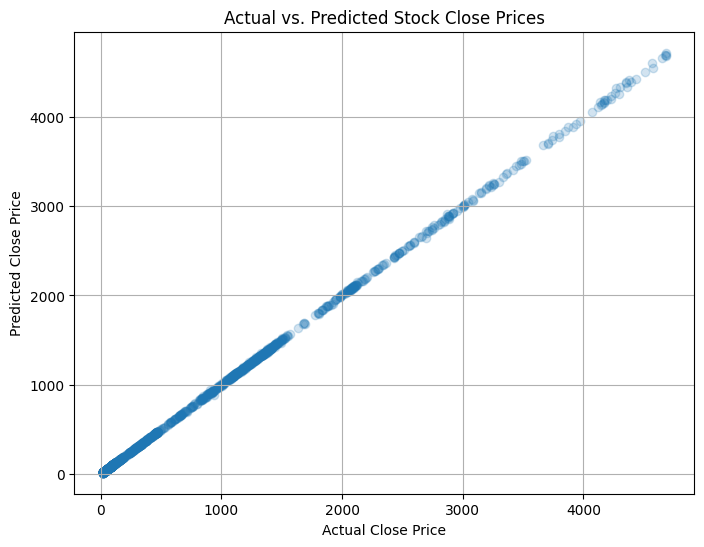

In [5]:
# draw the actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Stock Close Prices")
plt.grid(True)
plt.show()

In [29]:
# Predict the stock price for the next 6 monthes

trained_data = pd.read_csv('sixMons.csv')
future_features = pd.DataFrame(trained_data)  # Create a DataFrame for future features
 
future_prediction = model.predict(future_features)

print("Predicted Close Price for the Next 6 Months (180 dayes):")

for month, prediction in enumerate(future_prediction):
    print(f"Day {month+1}: {prediction}")




Predicted Close Price for the Next 6 Months (180 dayes):
Day 1: 4673.742030181419
Day 2: 4725.096187071518
Day 3: 4764.827095130432
Day 4: 4796.4333287519585
Day 5: 4794.108905043834
Day 6: 4794.781489319775
Day 7: 4779.513551293154
Day 8: 4779.926100690869
Day 9: 4798.768605621381
Day 10: 4748.1035024476005
Day 11: 4700.131823323647
Day 12: 4687.404144703467
Day 13: 4627.536445630365
Day 14: 4677.293072160528
Day 15: 4730.140948955354
Day 16: 4696.898780362177
Day 17: 4642.001838038466
Day 18: 4601.382398305225
Day 19: 4571.254058434801
Day 20: 4538.751929661183
Day 21: 4444.395686418209
Day 22: 4315.3759868678735
Day 23: 4347.548566680505
Day 24: 4376.321288604368
Day 25: 4367.934189247762
Day 26: 4361.090175154277
Day 27: 4465.745460704379
Day 28: 4518.247439882436
Day 29: 4571.862435151831
Day 30: 4507.181309470383
Day 31: 4496.1289339639125
Day 32: 4498.391034508246
Day 33: 4499.9059911326585
Day 34: 4571.162728887568
Day 35: 4536.183365118275
Day 36: 4462.055566967217
Day 37: 439